In [90]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [91]:
train_labels[0]

1

In [92]:
max([max(sequence) for sequence in train_data])

9999

In [93]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [94]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [95]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [96]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### model building using single hidden layer with 32 hidden units using tanh activation function

In [97]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

### Observations & Modifications:

#### Here the above neural network designed is a single layer and contains 32 hidden units with tanh activation function 
#### The output layer Sigmoid activation units 

### Compiling the model using mse instead of binary_crossentropy.

In [98]:
model.compile(optimizer="adam", #changing optimizer to ADAM
              loss="mean_squared_error",
              metrics=["accuracy"])

####  Among optimizers I prefer to select adam replacing rmsprop. 
#### From several sources and recent trends from google, Adam is considered as best among optimizers.
#### loss is change to mse from binary_crossentrophy

### Validating the approach

In [99]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [100]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 1s 11ms/step - loss: 0.1349 - accuracy: 0.8348 - val_loss: 0.0971 - val_accuracy: 0.8780
Epoch 2/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0658 - accuracy: 0.9261 - val_loss: 0.0836 - val_accuracy: 0.8912
Epoch 3/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0455 - accuracy: 0.9537 - val_loss: 0.0835 - val_accuracy: 0.8861
Epoch 4/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0335 - accuracy: 0.9686 - val_loss: 0.0848 - val_accuracy: 0.8836
Epoch 5/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9806 - val_loss: 0.0876 - val_accuracy: 0.8812
Epoch 6/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.9861 - val_loss: 0.0899 - val_accuracy: 0.8790
Epoch 7/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.9897 - val_loss: 0.0928 - val_accuracy: 0.8767
Epoch 8/20
59/59 [=

In [101]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the train & Validation loss

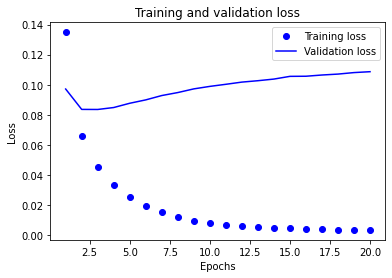

In [102]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

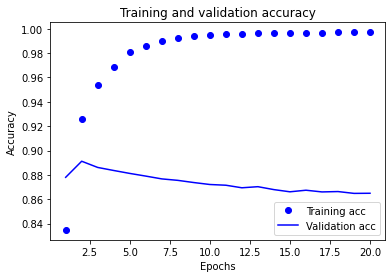

In [103]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the above figure we can notice that training accuracy almost reaches to 100 percent accurately 99.81 with 20 epochs
#### if we observe the validation accuracy, initially it tends to increase and then decreases may be at the end it gives a constant 86%

In [104]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.8532


In [105]:
results

[0.11842090636491776, 0.8532000184059143]

## Lets consider adding dropout layer & Regularizers

In [107]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(32,activation='tanh', activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", #changing optimizer to ADAM
              loss="mean_squared_error",
              metrics=["accuracy"])

          
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

          

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=0,
                    batch_size=256,
                    validation_data=(x_val, y_val))

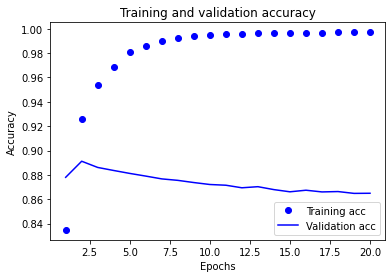

In [108]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### When I tried to use dropout layer it does not bring significant impact on my results
### validation accuracy just incremented on a decimal-- 86.69%

In [67]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.7688


In [68]:
results

[0.6047281622886658, 0.7688400149345398]

## Lets take a scenario with 3 hidden layers, Adam as optimizer with tanh activation function using mse as loss

In [69]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout


model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", #changing optimizer to ADAM
              loss="mean_squared_error",
              metrics=["accuracy"])

          
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

          

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 1s 11ms/step - loss: 1.4721 - accuracy: 0.7849 - val_loss: 1.1351 - val_accuracy: 0.8801
Epoch 2/20
59/59 [==============================] - 1s 9ms/step - loss: 0.9039 - accuracy: 0.9033 - val_loss: 0.6867 - val_accuracy: 0.8874
Epoch 3/20
59/59 [==============================] - 0s 7ms/step - loss: 0.5094 - accuracy: 0.9303 - val_loss: 0.3808 - val_accuracy: 0.8857
Epoch 4/20
59/59 [==============================] - 0s 7ms/step - loss: 0.2522 - accuracy: 0.9445 - val_loss: 0.1925 - val_accuracy: 0.8899
Epoch 5/20
59/59 [==============================] - 0s 7ms/step - loss: 0.1199 - accuracy: 0.9565 - val_loss: 0.1270 - val_accuracy: 0.8895
Epoch 6/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0836 - accuracy: 0.9615 - val_loss: 0.1157 - val_accuracy: 0.8872
Epoch 7/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0705 - accuracy: 0.9677 - val_loss: 0.1123 - val_accuracy: 0.8876
Epoch 8/20
59/59 [=

### Summary

Here are the brief summary about my assignment.

--> Firstly we imported the keras library from tensorflow module.
    
    
    from tensorflow import keras
    from tensorflow.keras import layers
    from keras.layers import Dense
    from keras.layers import Dropout
    
    
--> For Implementing the neural networks, we need the layers 
    
    1. input layer  -- using keras we try to create a model that starts with input represented using "Keras.Sequential"
       model = keras.Sequential()
    2. hidden layer -- we will add layers  using the format "model.add(Dense(32,activation='tanh'))"
        model.add(Dense(32,activation='tanh'))
        model.add(Dense(32,activation='tanh'))
        model.add(Dense(32,activation='tanh'))
    3. Output layer -- The ouput layer will have the 1 units which produces the unit, generally represent using 
       "model.add(Dense(1, activation='sigmoid'))"
    

---> Here I would like briefly explain "model.add(Dense(32,activation='tanh'))".

Basically, we are add a dense layer that contains 32 hidden units. It contains "tanh activation function".

The primary role of the Activation Function is to transform the summed weighted input from the node into an output value to be fed to the next hidden layer or as output.

Activation function Reference: www.v7labs.com/blog/neural-networks-activation-functions
    
---> when we say 2 or 3 hidden layers, it contains above definition 2 or 3 times.
---> Familar activation function are relu, tanh, sigmoid
---> Preferably output layer will have 1 units that products the result and mostly people use sigmoid.

model.compile(optimizer="adam", #changing optimizer to ADAM
              loss="mean_squared_error",
              metrics=["accuracy"])

--> The above statement says that it is going to compile the network using adam optimizer with loss (mse) and accuracy metric.

Optimizer: Optimizers are Classes or methods used to change the attributes of your machine/deep learning model such as weights and learning rate in order to reduce the losses. 
    Optimizers help to get results faster. Available optimizers are listed below

SGD
RMSprop
Adam
Adadelta
Adagrad
Adamax
Nadam
Ftrl
Optimizers Reference : 
https://keras.io/api/optimizers/
analyticsindiamag.com/guide-to-tensorflow-keras-optimizers/

Loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
    
Available losses: we have a bunch of probabilist loss and regression loss. In the below reference it clearly explains.
    
Reference: https://keras.io/api/losses/
        
Below piece are code are splitting the data for vaidation from traininig          
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

---> Lastly we train the model using the model.fit. That takes training data, also it check with validation during every eopoch and results will be plotted.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

---> The below graphs displays the plots for accuracy and loss.

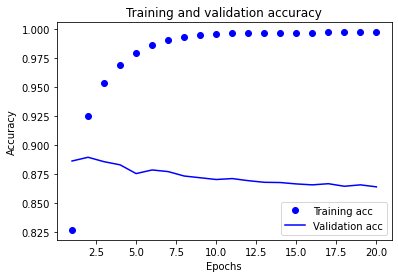

In [23]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 982us/step - loss: 0.1316 - accuracy: 0.8554


[0.13158853352069855, 0.8553599715232849]

## Conclusions

##### 1. neural network designed with single layer and 3 layers
##### 2. Activation functions tanh is used instead of relu
##### 3. Optimizer adam is used instead of rmsprop
##### 4. Dropout layer is added with 0.4 and 0.5 at single layer and 3 layers models respectively.
##### 5. L1 & L2 regularizers are used.

#### so finally, I conclude for this IMDB I got an training accuracy 99 % and when we look at validation accuracy amoong the 
#### two apporaches it touches 76.72 in single layer approach and 86.41 in three layered approach.

### I can assume this can be increased with adding more data, initially i thought of overfitting but later upon addition of dropout layers 
### accuracy is 87.20 when i tried to use dropouts and regularizers L1 & L2 using 3 layered approach.

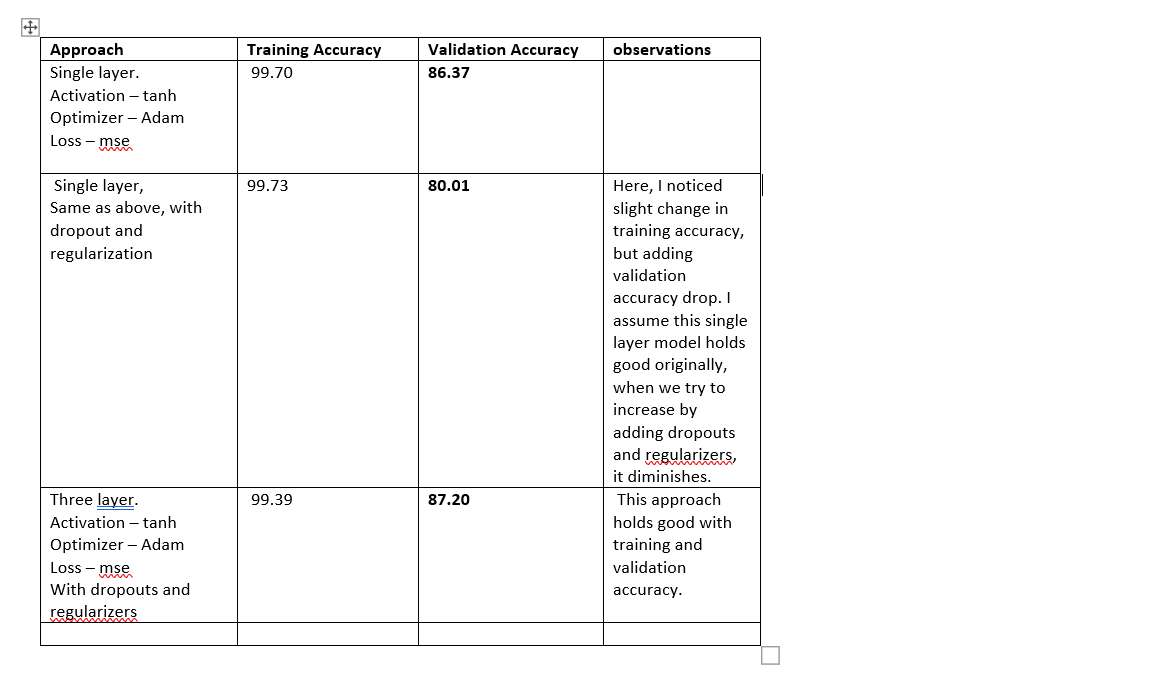
